# Pizza Sales Analysis (EDA + Predictive Modeling)

**Objective:** Analyze sales data from a pizza chain to uncover key trends, customer behavior, and predict future revenue using regression models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview

**Loading all CSV files into DataFrames**

In [2]:
orders = pd.read_csv("C:/Users/samir sah/Desktop/RStudio/program/python/pizza hut analysis/order_details.csv")

In [3]:
order_details = pd.read_csv("C:/Users/samir sah/Desktop/RStudio/program/python/pizza hut analysis/orders.csv")

In [4]:
pizzas = pd.read_csv("C:/Users/samir sah/Desktop/RStudio/program/python/pizza hut analysis/pizzas.csv")

In [5]:
pizza_types = pd.read_csv("C:/Users/samir sah/Desktop/RStudio/program/python/pizza hut analysis/pizza_types.csv",encoding='latin1')

## Previewing the Data

In [7]:
print("Orders Table:")
print(orders.head())

Orders Table:
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1


In [8]:
print(orders.tail())

       order_details_id  order_id       pizza_id  quantity
48615             48616     21348  ckn_alfredo_m         1
48616             48617     21348  four_cheese_l         1
48617             48618     21348   napolitana_s         1
48618             48619     21349     mexicana_l         1
48619             48620     21350      bbq_ckn_s         1


In [9]:
print(orders.shape)
print(orders.info)

(48620, 4)
<bound method DataFrame.info of        order_details_id  order_id       pizza_id  quantity
0                     1         1     hawaiian_m         1
1                     2         2  classic_dlx_m         1
2                     3         2  five_cheese_l         1
3                     4         2    ital_supr_l         1
4                     5         2     mexicana_m         1
...                 ...       ...            ...       ...
48615             48616     21348  ckn_alfredo_m         1
48616             48617     21348  four_cheese_l         1
48617             48618     21348   napolitana_s         1
48618             48619     21349     mexicana_l         1
48619             48620     21350      bbq_ckn_s         1

[48620 rows x 4 columns]>


In [10]:
print("Order Details Table:")
print(order_details.head())


Order Details Table:
   order_id        date      time
0         1  01-01-2015  11:38:36
1         2  01-01-2015  11:57:40
2         3  01-01-2015  12:12:28
3         4  01-01-2015  12:16:31
4         5  01-01-2015  12:21:30


In [11]:
print(order_details.tail())

       order_id        date      time
21345     21346  31-12-2015  20:51:07
21346     21347  31-12-2015  21:14:37
21347     21348  31-12-2015  21:23:10
21348     21349  31-12-2015  22:09:54
21349     21350  31-12-2015  23:02:05


In [12]:
print(order_details.shape)
print(order_details.info)

(21350, 3)
<bound method DataFrame.info of        order_id        date      time
0             1  01-01-2015  11:38:36
1             2  01-01-2015  11:57:40
2             3  01-01-2015  12:12:28
3             4  01-01-2015  12:16:31
4             5  01-01-2015  12:21:30
...         ...         ...       ...
21345     21346  31-12-2015  20:51:07
21346     21347  31-12-2015  21:14:37
21347     21348  31-12-2015  21:23:10
21348     21349  31-12-2015  22:09:54
21349     21350  31-12-2015  23:02:05

[21350 rows x 3 columns]>


In [13]:
print("Pizzas Table:")
print(pizzas.head())

Pizzas Table:
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75


In [14]:
print(pizzas.tail())

         pizza_id pizza_type_id size  price
91  spinach_fet_m   spinach_fet    M  16.00
92  spinach_fet_l   spinach_fet    L  20.25
93   veggie_veg_s    veggie_veg    S  12.00
94   veggie_veg_m    veggie_veg    M  16.00
95   veggie_veg_l    veggie_veg    L  20.25


In [15]:
print(pizzas.shape)
print(pizzas.info)

(96, 4)
<bound method DataFrame.info of          pizza_id pizza_type_id size  price
0       bbq_ckn_s       bbq_ckn    S  12.75
1       bbq_ckn_m       bbq_ckn    M  16.75
2       bbq_ckn_l       bbq_ckn    L  20.75
3      cali_ckn_s      cali_ckn    S  12.75
4      cali_ckn_m      cali_ckn    M  16.75
..            ...           ...  ...    ...
91  spinach_fet_m   spinach_fet    M  16.00
92  spinach_fet_l   spinach_fet    L  20.25
93   veggie_veg_s    veggie_veg    S  12.00
94   veggie_veg_m    veggie_veg    M  16.00
95   veggie_veg_l    veggie_veg    L  20.25

[96 rows x 4 columns]>


In [16]:
print("Pizza Types Table:")
print(pizza_types.head())

Pizza Types Table:
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...  


In [17]:
print(pizza_types.tail())

   pizza_type_id                               name category  \
27  mediterraneo            The Mediterranean Pizza   Veggie   
28      mexicana                 The Mexicana Pizza   Veggie   
29    spin_pesto            The Spinach Pesto Pizza   Veggie   
30   spinach_fet         The Spinach and Feta Pizza   Veggie   
31    veggie_veg  The Vegetables + Vegetables Pizza   Veggie   

                                          ingredients  
27  Spinach, Artichokes, Kalamata Olives, Sun-drie...  
28  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...  
29  Spinach, Artichokes, Tomatoes, Sun-dried Tomat...  
30  Spinach, Mushrooms, Red Onions, Feta Cheese, G...  
31  Mushrooms, Tomatoes, Red Peppers, Green Pepper...  


In [18]:
print(pizza_types.shape)
print(pizza_types.info)

(32, 4)
<bound method DataFrame.info of    pizza_type_id                                        name category  \
0        bbq_ckn                  The Barbecue Chicken Pizza  Chicken   
1       cali_ckn                The California Chicken Pizza  Chicken   
2    ckn_alfredo                   The Chicken Alfredo Pizza  Chicken   
3      ckn_pesto                     The Chicken Pesto Pizza  Chicken   
4     southw_ckn                 The Southwest Chicken Pizza  Chicken   
5       thai_ckn                      The Thai Chicken Pizza  Chicken   
6       big_meat                          The Big Meat Pizza  Classic   
7    classic_dlx                    The Classic Deluxe Pizza  Classic   
8       hawaiian                          The Hawaiian Pizza  Classic   
9    ital_cpcllo                 The Italian Capocollo Pizza  Classic   
10    napolitana                        The Napolitana Pizza  Classic   
11   pep_msh_pep  The Pepperoni, Mushroom, and Peppers Pizza  Classic   
12     pepp

## Data Merging and Cleaning

#### Checking for missing values

In [63]:
# Check nulls and data types for each DataFrame
print("🔍 Orders:")
print(orders.info(), "\n")

print("🔍 Order Details:")
print(order_details.info(), "\n")

print("🔍 Pizzas:")
print(pizzas.info(), "\n")

print("🔍 Pizza Types:")
print(pizza_types.info(), "\n")


🔍 Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None 

🔍 Order Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB
None 

🔍 Pizzas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------        

In [19]:
order_details['date'] = pd.to_datetime(order_details['date'], dayfirst=True)

In [20]:
# Convert 'date' and 'time' to proper formats
order_details['date'] = pd.to_datetime(order_details['date'])
order_details['time'] = pd.to_datetime(order_details['time'], format='%H:%M:%S').dt.time

In [21]:
orders.columns = orders.columns.str.strip()
order_details.columns = order_details.columns.str.strip()
pizzas.columns = pizzas.columns.str.strip()
pizza_types.columns = pizza_types.columns.str.strip()

In [22]:
# Step 1: orders + order_details 
df = pd.merge(orders, order_details, on='order_id', how='left')

# Step 2: merge with corrected pizzas (has pizza_id)
df = pd.merge(df, pizzas, on='pizza_id', how='left')

# Step 3: merge with corrected pizza_types (has pizza_type_id)
df = pd.merge(df, pizza_types, on='pizza_type_id', how='left')


In [23]:
print("Final merged DataFrame:")
print(df.head())
print("Columns:", df.columns)


Final merged DataFrame:
   order_details_id  order_id       pizza_id  quantity       date      time  \
0                 1         1     hawaiian_m         1 2015-01-01  11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01  11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01  11:57:40   
3                 4         2    ital_supr_l         1 2015-01-01  11:57:40   
4                 5         2     mexicana_m         1 2015-01-01  11:57:40   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  
0           Sliced Ham, Pineapple, Mozzarel

## EXPLORATORY DATA ANALYSIS

#### Total Revenue and Quantity sold

In [24]:
# Total revenue
total_revenue = round((df['quantity'] * df['price']).sum(), 2)

# Total number of pizzas sold
total_pizzas = df['quantity'].sum()

print(f" Total Revenue: ₹{total_revenue}")
print(f" Total Pizzas Sold: {total_pizzas}")

 Total Revenue: ₹817860.05
 Total Pizzas Sold: 49574


#### Top 10 pizzas by quantity sold 

In [25]:
top_pizzas = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

print("Top 10 Best-Selling Pizzas (by quantity):")
print(top_pizzas)

Top 10 Best-Selling Pizzas (by quantity):
name
The Classic Deluxe Pizza        2453
The Barbecue Chicken Pizza      2432
The Hawaiian Pizza              2422
The Pepperoni Pizza             2418
The Thai Chicken Pizza          2371
The California Chicken Pizza    2370
The Sicilian Pizza              1938
The Spicy Italian Pizza         1924
The Southwest Chicken Pizza     1917
The Big Meat Pizza              1914
Name: quantity, dtype: int64


In [30]:
# Group by pizza name and sum revenue
top_revenue_pizzas = df.groupby('name')['revenue'].sum().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 Revenue-Generating Pizzas:")
print(top_revenue_pizzas)


Top 10 Revenue-Generating Pizzas:
name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
The Southwest Chicken Pizza     34705.75
The Italian Supreme Pizza       33476.75
The Hawaiian Pizza              32273.25
The Four Cheese Pizza           32265.70
The Sicilian Pizza              30940.50
Name: revenue, dtype: float64


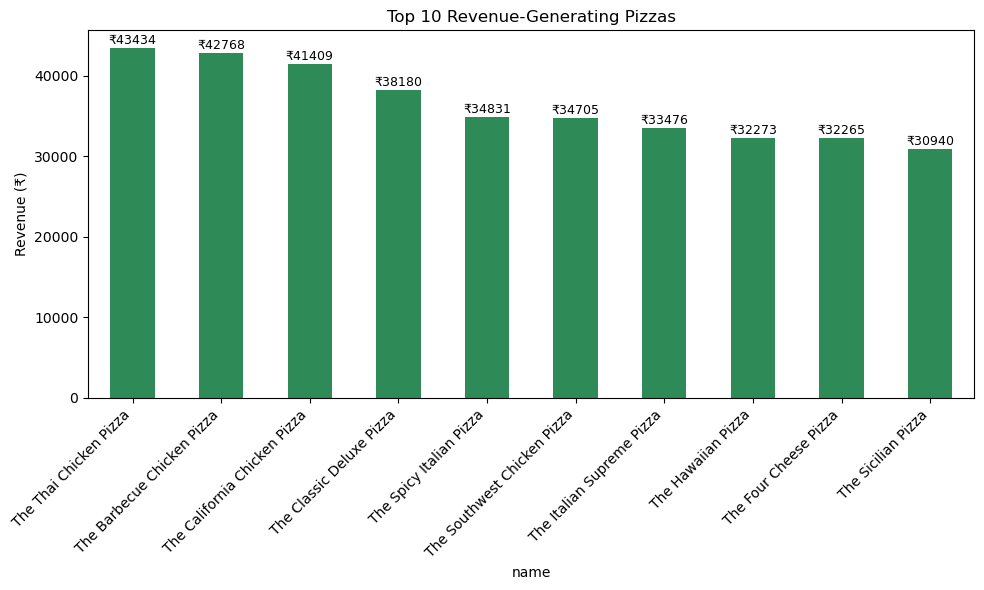

In [31]:
# Bar plot
plt.figure(figsize=(10,6))
ax = top_revenue_pizzas.plot(kind='bar', color='seagreen')
plt.title('Top 10 Revenue-Generating Pizzas')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top
for i, value in enumerate(top_revenue_pizzas):
    plt.text(i, value + 100, f'₹{int(value)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Sales by Category

In [32]:
category_sales = df.groupby('category')['quantity'].sum().sort_values(ascending=False)

print("Total Pizzas Sold by Category:")
print(category_sales)

Total Pizzas Sold by Category:
category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64


In [33]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

print("Revenue by Pizza Category:")
print(category_revenue)

Revenue by Pizza Category:
category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: revenue, dtype: float64


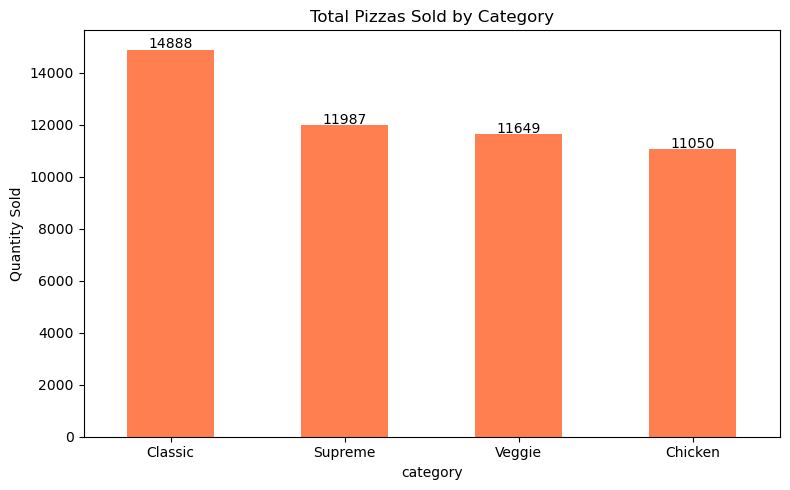

In [34]:
plt.figure(figsize=(8,5))
ax = category_sales.plot(kind='bar', color='coral')
plt.title('Total Pizzas Sold by Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)

for i, value in enumerate(category_sales):
    plt.text(i, value + 50, f'{int(value)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


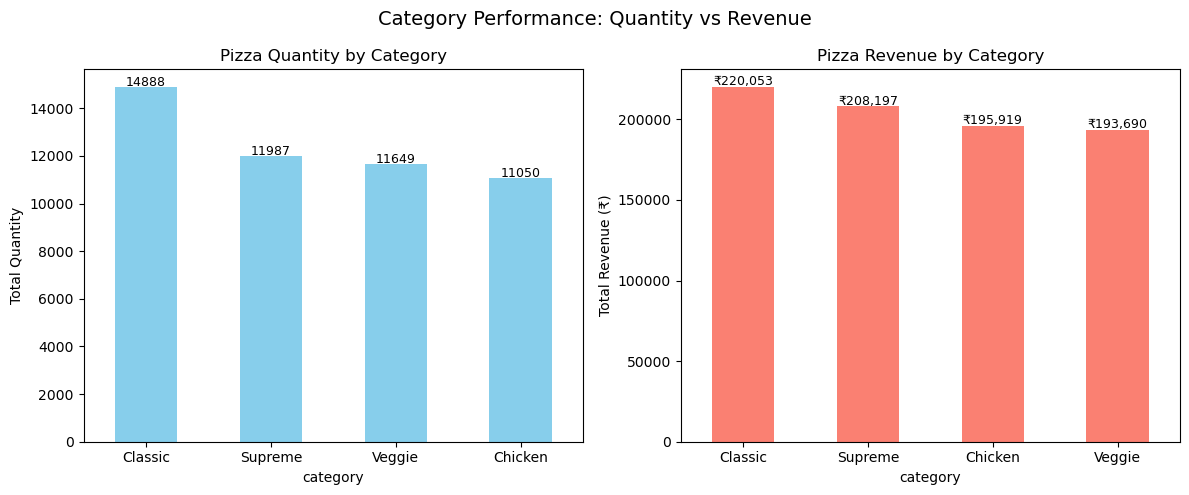

In [35]:
# Grouped data
category_qty = df.groupby('category')['quantity'].sum().sort_values(ascending=False)
category_rev = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Quantity plot
category_qty.plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Pizza Quantity by Category')
ax[0].set_ylabel('Total Quantity')
ax[0].set_xticklabels(category_qty.index, rotation=0)
for i, val in enumerate(category_qty):
    ax[0].text(i, val + 50, str(int(val)), ha='center', fontsize=9)

# Revenue plot
category_rev.plot(kind='bar', color='salmon', ax=ax[1])
ax[1].set_title('Pizza Revenue by Category')
ax[1].set_ylabel('Total Revenue (₹)')
ax[1].set_xticklabels(category_rev.index, rotation=0)
for i, val in enumerate(category_rev):
    ax[1].text(i, val + 1000, f'₹{int(val):,}', ha='center', fontsize=9)

plt.suptitle('Category Performance: Quantity vs Revenue', fontsize=14)
plt.tight_layout()
plt.show()

#### Actionable Insight
#### Classic pizzas lead in both quantity (14,888 sold) and revenue (₹220,053), making them the top-performing category overall.
#### Chicken pizzas sold the least (11,050), but still contributed ₹195,919 — higher revenue per unit than Veggie, which sold more.

#### Recommendation
#### Promote Chicken pizzas as premium items — they yield high revenue with fewer orders.

#### Use Classic pizzas in combo offers or bundles to drive both volume and profit.

### Sales by Size

In [36]:
size_revenue = df.groupby('size')['revenue'].sum().sort_values(ascending=False)

print("Revenue by Size:")
print(size_revenue)

Revenue by Size:
size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64


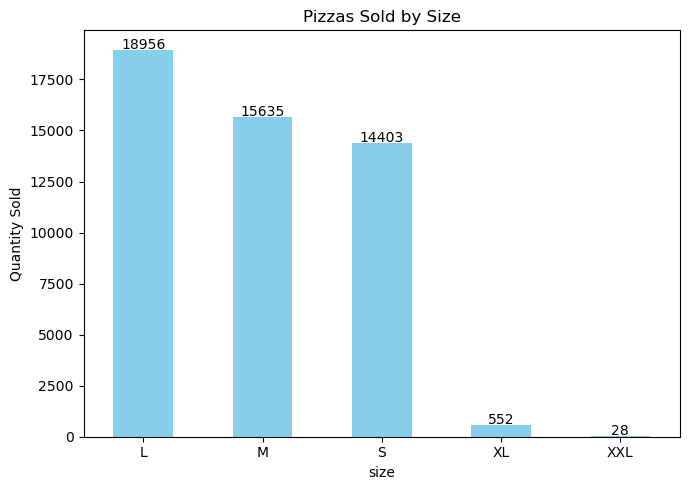

In [38]:
# Define size_sales before plotting
size_sales = df.groupby('size')['quantity'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(7,5))
ax = size_sales.plot(kind='bar', color='skyblue')
plt.title('Pizzas Sold by Size')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)

# Add value labels
for i, value in enumerate(size_sales):
    plt.text(i, value + 50, f'{int(value)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


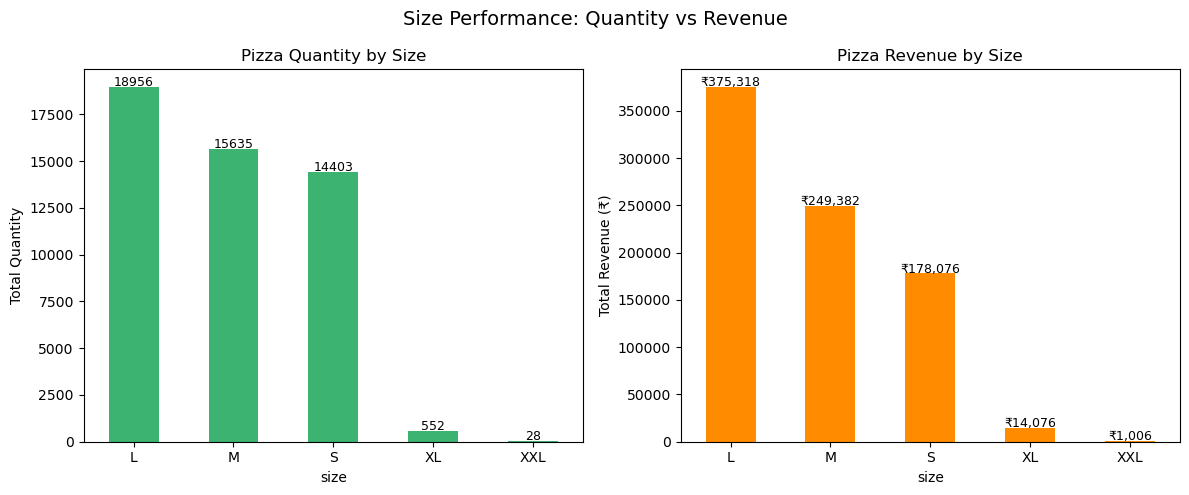

In [39]:
# Grouped data
size_qty = df.groupby('size')['quantity'].sum().sort_values(ascending=False)
size_rev = df.groupby('size')['revenue'].sum().sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Quantity plot
size_qty.plot(kind='bar', color='mediumseagreen', ax=ax[0])
ax[0].set_title('Pizza Quantity by Size')
ax[0].set_ylabel('Total Quantity')
ax[0].set_xticklabels(size_qty.index, rotation=0)
for i, val in enumerate(size_qty):
    ax[0].text(i, val + 50, str(int(val)), ha='center', fontsize=9)

# Revenue plot
size_rev.plot(kind='bar', color='darkorange', ax=ax[1])
ax[1].set_title('Pizza Revenue by Size')
ax[1].set_ylabel('Total Revenue (₹)')
ax[1].set_xticklabels(size_rev.index, rotation=0)
for i, val in enumerate(size_rev):
    ax[1].text(i, val + 1000, f'₹{int(val):,}', ha='center', fontsize=9)

plt.suptitle('Size Performance: Quantity vs Revenue', fontsize=14)
plt.tight_layout()
plt.show()


#### Insight: Large-sized pizzas dominate in sales.
#### Recommendation: Introduce family bundles and loyalty programs around large-sized pizzas to push volume and retention.

## Revenue Trend Over Time

In [40]:
# Create a new daily revenue DataFrame
daily_revenue = df.groupby('date')['revenue'].sum().reset_index()
daily_revenue = daily_revenue.sort_values('date')

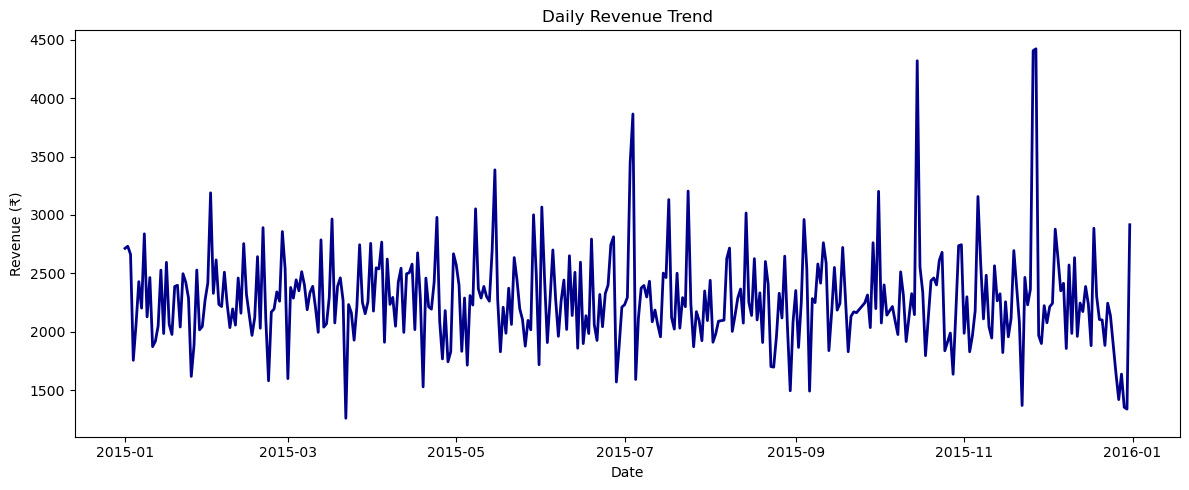

In [41]:
plt.figure(figsize=(12,5))
plt.plot(daily_revenue['date'], daily_revenue['revenue'], color='darkblue', linewidth=2)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

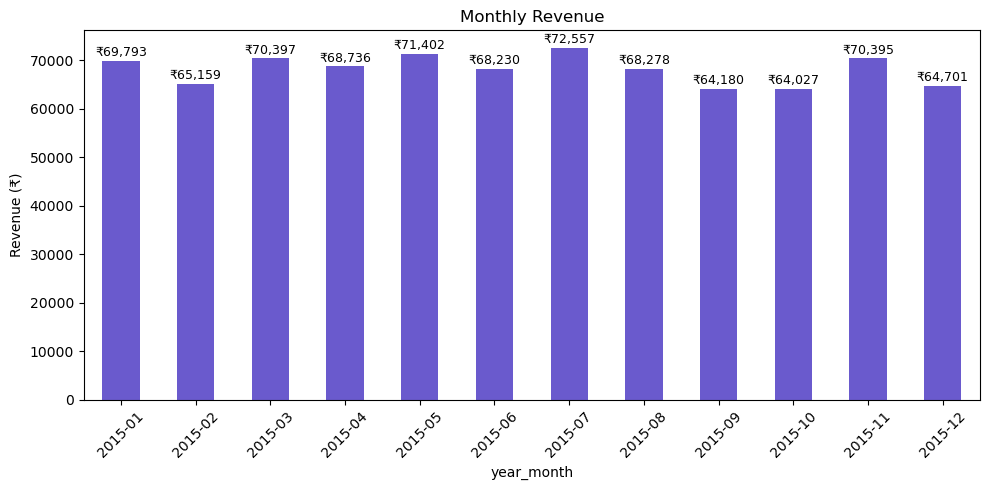

In [43]:
# Create a new column for revenue
df['revenue'] = df['quantity'] * df['price']

# Step 2: Extract year and month
df['year_month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['revenue'].sum()

# Step 3: Plot with value labels
plt.figure(figsize=(10,5))
ax = monthly_revenue.plot(kind='bar', color='slateblue')
plt.title('Monthly Revenue')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)

for i, value in enumerate(monthly_revenue):
    ax.text(i, value + 1000, f'₹{int(value):,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [44]:
# Extract hour from time column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [45]:
hourly_orders = df.groupby('hour')['order_id'].count()

print("Orders by Hour:")
print(hourly_orders)


Orders by Hour:
hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: order_id, dtype: int64


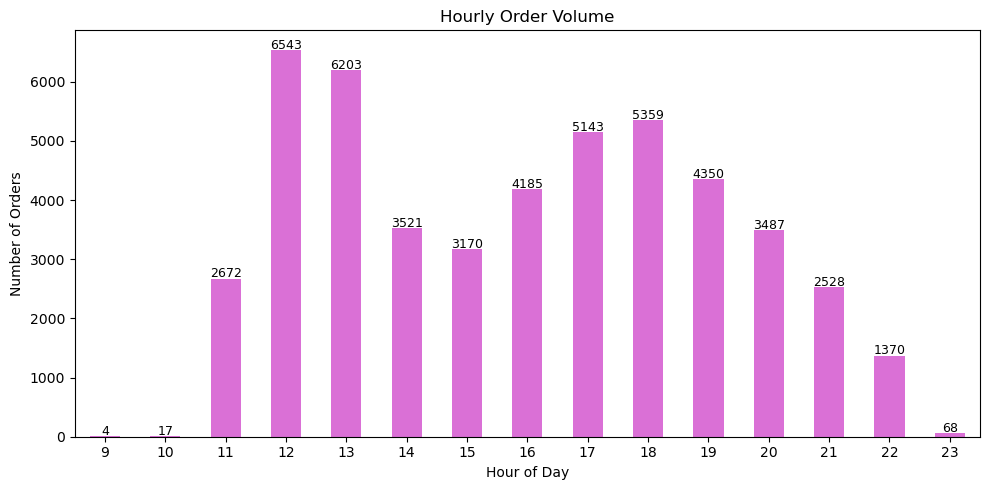

In [46]:
plt.figure(figsize=(10,5))
hourly_orders.plot(kind='bar', color='orchid')
plt.title('Hourly Order Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

# Add labels on bars
for i, value in enumerate(hourly_orders):
    plt.text(i, value + 20, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

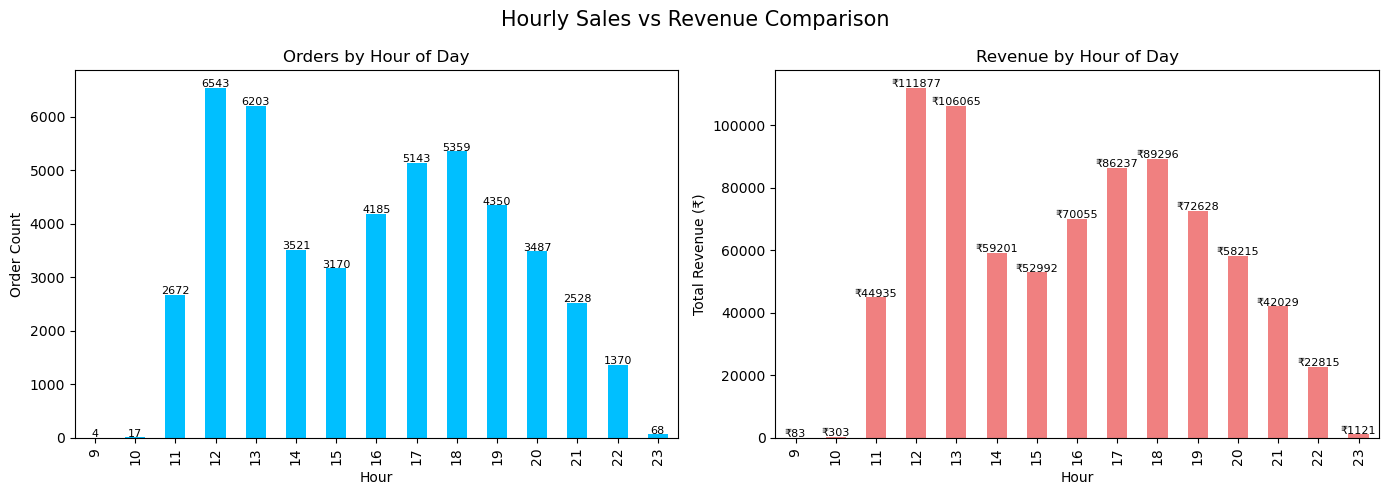

In [47]:
# Grouped data
hourly_qty = df.groupby('hour')['order_id'].count().sort_index()  # total rows = total orders
hourly_rev = df.groupby('hour')['revenue'].sum().sort_index()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Orders per hour
hourly_qty.plot(kind='bar', color='deepskyblue', ax=ax[0])
ax[0].set_title('Orders by Hour of Day')
ax[0].set_ylabel('Order Count')
ax[0].set_xlabel('Hour')
for i, val in enumerate(hourly_qty):
    ax[0].text(i, val + 10, str(int(val)), ha='center', fontsize=8)

# Revenue per hour
hourly_rev.plot(kind='bar', color='lightcoral', ax=ax[1])
ax[1].set_title('Revenue by Hour of Day')
ax[1].set_ylabel('Total Revenue (₹)')
ax[1].set_xlabel('Hour')
for i, val in enumerate(hourly_rev):
    ax[1].text(i, val + 200, f'₹{int(val)}', ha='center', fontsize=8)

plt.suptitle('Hourly Sales vs Revenue Comparison', fontsize=15)
plt.tight_layout()
plt.show()


In [48]:
# Day of week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.day_name()

# Is weekend?
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Month
df['month'] = df['date'].dt.month_name()


In [49]:
# Revenue by day of week
day_rev = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)
print(day_rev)

# Revenue: Weekend vs Weekday
print(df.groupby('is_weekend')['revenue'].sum())


day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64
is_weekend
False    595474.15
True     222385.90
Name: revenue, dtype: float64


#### Insight: Friday is the top day for revenue, followed by Thursday and Saturday. Sunday has the lowest sales.
#### Recommendation: Run “Weekend Comeback” offers on Sundays to pull traffic. Launch Friday Flash Deals to capitalize on peak day performance.

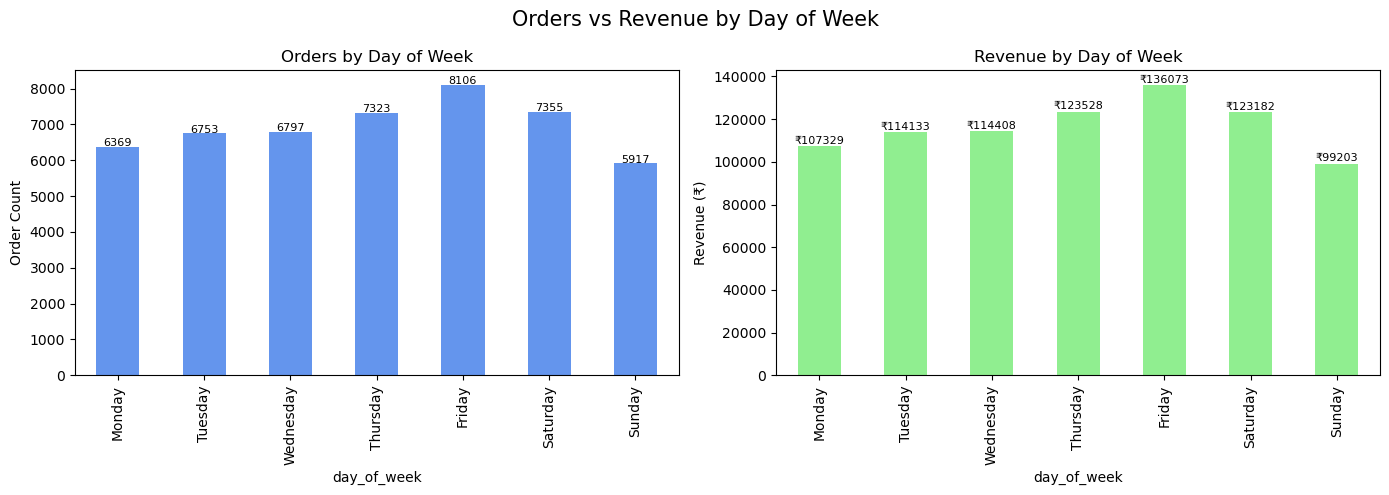

In [50]:
# Prepare data
dow_qty = df.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
dow_rev = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)

# Ensure consistent weekday order (Mon to Sun)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_qty = dow_qty.reindex(ordered_days)
dow_rev = dow_rev.reindex(ordered_days)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Orders by day
dow_qty.plot(kind='bar', color='cornflowerblue', ax=ax[0])
ax[0].set_title('Orders by Day of Week')
ax[0].set_ylabel('Order Count')
for i, val in enumerate(dow_qty):
    ax[0].text(i, val + 20, str(int(val)), ha='center', fontsize=8)

# Revenue by day
dow_rev.plot(kind='bar', color='lightgreen', ax=ax[1])
ax[1].set_title('Revenue by Day of Week')
ax[1].set_ylabel('Revenue (₹)')
for i, val in enumerate(dow_rev):
    ax[1].text(i, val + 1000, f'₹{int(val)}', ha='center', fontsize=8)

plt.suptitle('Orders vs Revenue by Day of Week', fontsize=15)
plt.tight_layout()
plt.show()


In [56]:
# Day of week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['date'].dt.day_name()

# Is weekend?
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Month
df['month'] = df['date'].dt.month_name()


In [52]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['size', 'category', 'day_of_week'], drop_first=True)


In [53]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 R² Score: {r2:.2f}")
print(f"📉 Mean Absolute Error: ₹{mae:.2f}")


📈 R² Score: 0.60
📉 Mean Absolute Error: ₹1.22
